# **Introduction**: The goal of this notebook is to create a machine learning model to accurately predict cases of car insurance fraud and to understand what characterisitcs in a claim are most indicative of fraud

Data: https://www.kaggle.com/roshansharma/insurance-claim

GitHub: https://github.com/ArielJosephCohen/capstone

Presentation: https://docs.google.com/presentation/d/1oUIwD1Y3reYto43LgdyXyQJzksOHXzq6XmDgNv28LpU/edit#slide=id.p

# **Notebook**

## Imports

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats
#import helper_module as hm
#from helper_module import *
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv('Claims.csv')
df2 = pd.read_csv('Claims.csv')

## Randomness

In [3]:
seed = 14

## Look at data

In [4]:
print(df.shape)
(df.head())

(1000, 39)


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [5]:
(df.columns)

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [6]:
(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
months_as_customer             1000 non-null int64
age                            1000 non-null int64
policy_number                  1000 non-null int64
policy_bind_date               1000 non-null object
policy_state                   1000 non-null object
policy_csl                     1000 non-null object
policy_deductable              1000 non-null int64
policy_annual_premium          1000 non-null float64
umbrella_limit                 1000 non-null int64
insured_zip                    1000 non-null int64
insured_sex                    1000 non-null object
insured_education_level        1000 non-null object
insured_occupation             1000 non-null object
insured_hobbies                1000 non-null object
insured_relationship           1000 non-null object
capital-gains                  1000 non-null int64
capital-loss                   1000 non-null int64
incident_date    

In [7]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [8]:
df.fraud_reported.value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [ ]:
plt.tight_layout()
(sns.pairplot(df))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x123c26250>,
      dtype=object)

<Figure size 432x288 with 0 Axes>

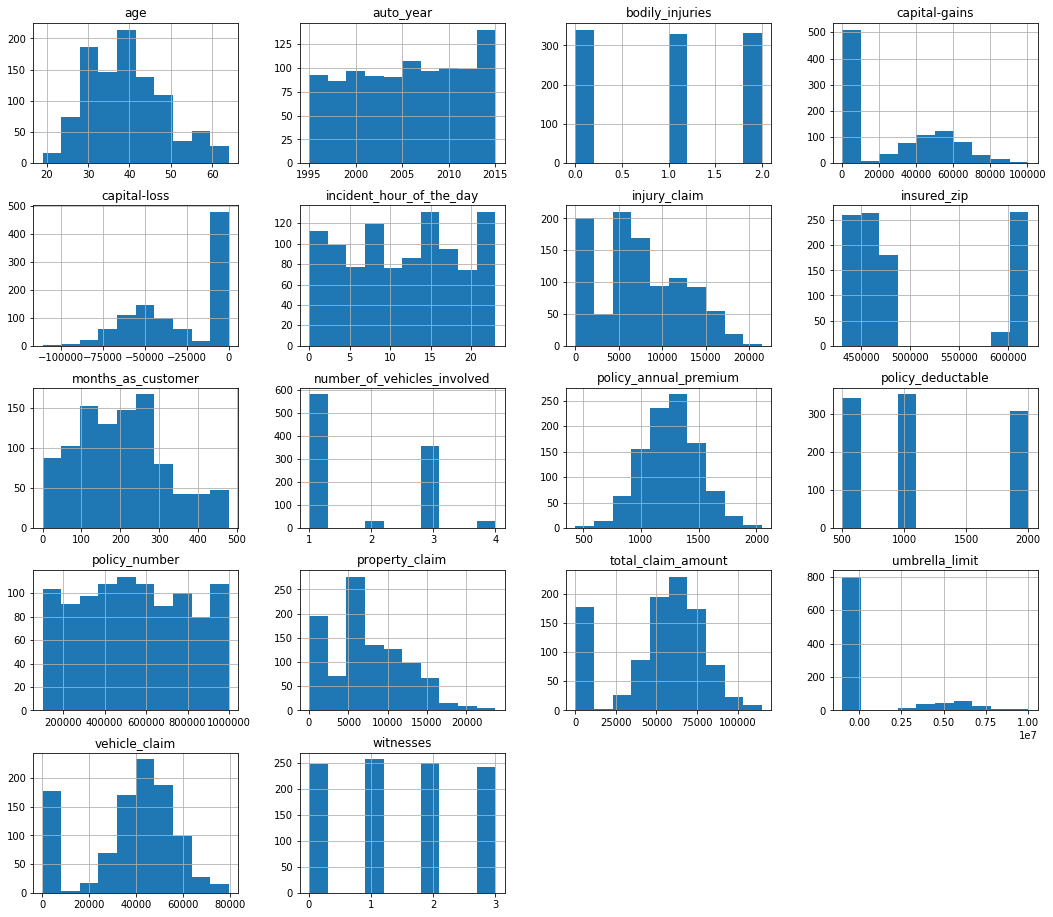

In [9]:
plt.tight_layout()
df.hist(figsize=(18,16))

## Exploratory data analysis

In [10]:
fraud_df = df[df['fraud_reported']=='Y']

In [11]:
fraud_df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
5,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,...,2,NO,64100,6410,6410,51280,Saab,95,2003,Y
14,180,38,644081,28-12-1998,OH,250/500,2000,1301.13,0,476685,...,2,YES,46200,4200,8400,33600,Dodge,Neon,2003,Y


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x125212950>,
      dtype=object)

<Figure size 432x288 with 0 Axes>

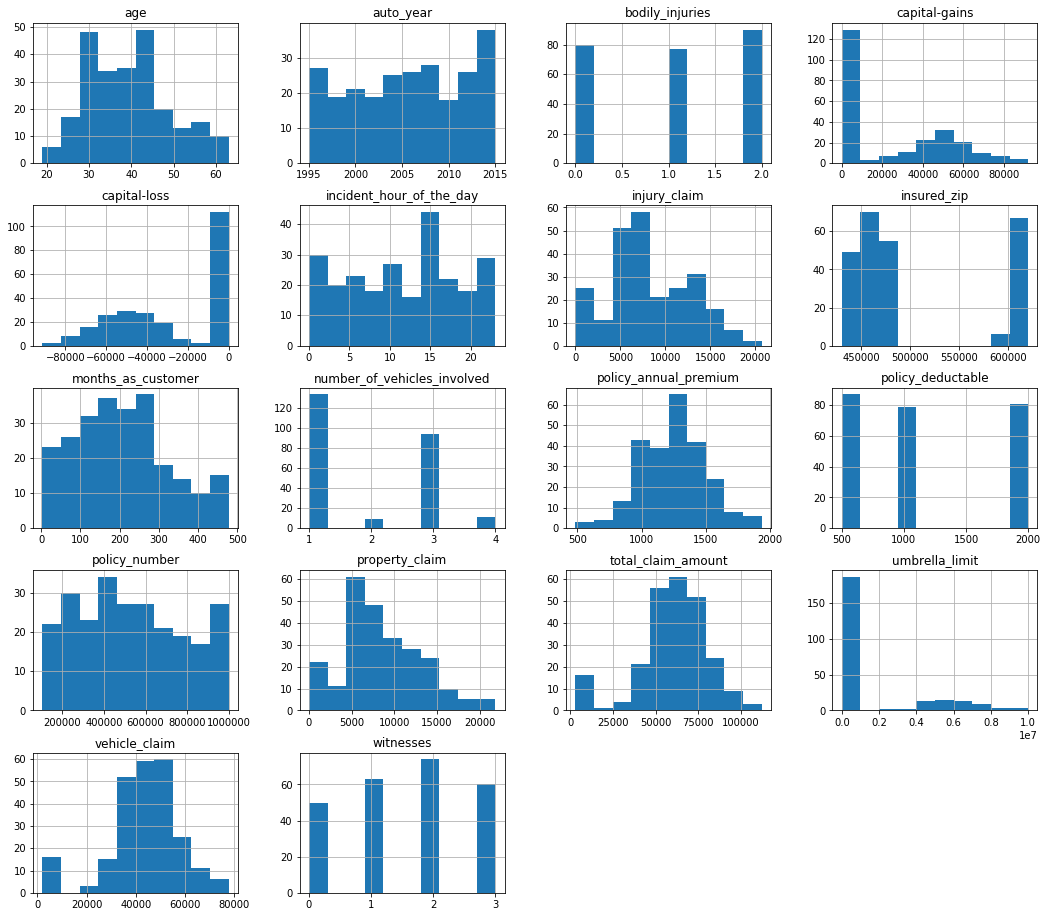

In [12]:
plt.tight_layout()
fraud_df.hist(figsize=(18,16))

## Address categorical features

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
months_as_customer             1000 non-null int64
age                            1000 non-null int64
policy_number                  1000 non-null int64
policy_bind_date               1000 non-null object
policy_state                   1000 non-null object
policy_csl                     1000 non-null object
policy_deductable              1000 non-null int64
policy_annual_premium          1000 non-null float64
umbrella_limit                 1000 non-null int64
insured_zip                    1000 non-null int64
insured_sex                    1000 non-null object
insured_education_level        1000 non-null object
insured_occupation             1000 non-null object
insured_hobbies                1000 non-null object
insured_relationship           1000 non-null object
capital-gains                  1000 non-null int64
capital-loss                   1000 non-null int64
incident_date    

In [14]:
num_list = ['months_as_customer','age','policy_number','policy_deductable','policy_annual_premium','umbrella_limit','insured_zip','capital-gains','capital-loss','incident_hour_of_the_day','number_of_vehicles_involved','witnesses','bodily_injuries','total_claim_amount','injury_claim','property_claim','vehicle_claim','auto_year']

In [15]:
cat_list = ['policy_bind_date','policy_state','policy_csl','insured_sex','insured_education_level','insured_occupation','insured_hobbies','insured_relationship','incident_date','incident_type','collision_type','incident_severity','authorities_contacted','incident_state','incident_city','property_damage','police_report_available','auto_make','auto_model','fraud_reported']

In [16]:
for col in cat_list:
    print (col,df[col].nunique())

policy_bind_date 951
policy_state 3
policy_csl 3
insured_sex 2
insured_education_level 7
insured_occupation 14
insured_hobbies 20
insured_relationship 6
incident_date 60
incident_type 4
collision_type 4
incident_severity 4
authorities_contacted 5
incident_state 7
incident_city 7
property_damage 3
police_report_available 3
auto_make 14
auto_model 39
fraud_reported 2


In [17]:
df[cat_list].head()

,policy_bind_date,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,property_damage,police_report_available,auto_make,auto_model,fraud_reported
0,17-10-2014,OH,250/500,MALE,MD,craft-repair,sleeping,husband,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,YES,YES,Saab,92x,Y
1,27-06-2006,IN,250/500,MALE,MD,machine-op-inspct,reading,other-relative,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,?,?,Mercedes,E400,Y
2,06-09-2000,OH,100/300,FEMALE,PhD,sales,board-games,own-child,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,NO,NO,Dodge,RAM,N
3,25-05-1990,IL,250/500,FEMALE,PhD,armed-forces,board-games,unmarried,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,?,NO,Chevrolet,Tahoe,Y
4,06-06-2014,IL,500/1000,MALE,Associate,sales,board-games,unmarried,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,NO,NO,Accura,RSX,N


In [18]:
df.policy_bind_date=pd.to_datetime(df.policy_bind_date)

In [19]:
def gender_val(row):
    if row['insured_sex'] == 'MALE':
        return 1
    else:
        return 0

In [20]:
df['insured_sex']=df.apply(gender_val,axis=1)

In [21]:
df.incident_date=pd.to_datetime(df.incident_date)

In [22]:
df['timeline']=df.incident_date-df.policy_bind_date

In [23]:
df[num_list].head()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,witnesses,bodily_injuries,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
0,328,48,521585,1000,1406.91,0,466132,53300,0,5,1,2,1,71610,6510,13020,52080,2004
1,228,42,342868,2000,1197.22,5000000,468176,0,0,8,1,0,0,5070,780,780,3510,2007
2,134,29,687698,2000,1413.14,5000000,430632,35100,0,7,3,3,2,34650,7700,3850,23100,2007
3,256,41,227811,2000,1415.74,6000000,608117,48900,-62400,5,1,2,1,63400,6340,6340,50720,2014
4,228,44,367455,1000,1583.91,6000000,610706,66000,-46000,20,1,1,0,6500,1300,650,4550,2009


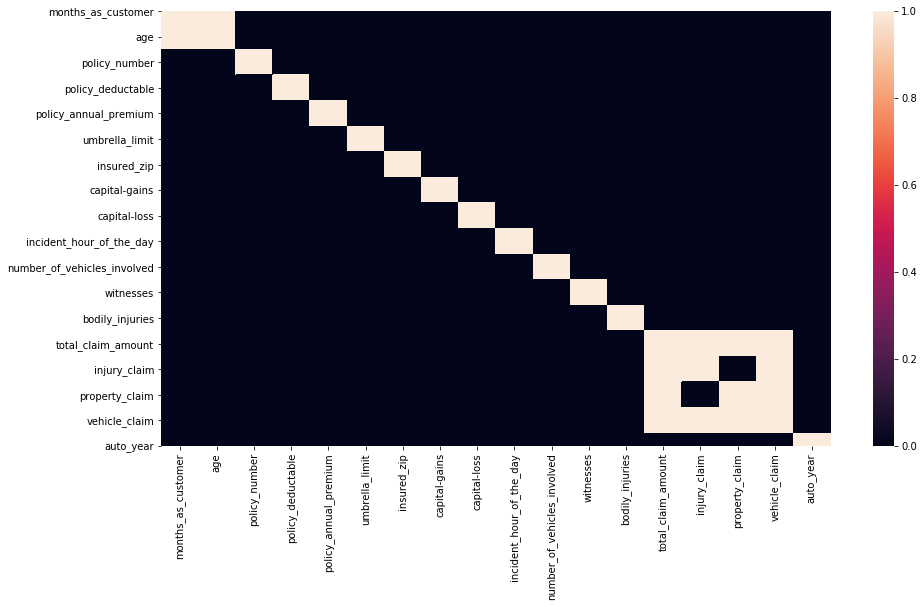

In [24]:
plt.figure(figsize=(15,8))
plt.tight_layout()
sns.heatmap(df[num_list].corr()>=0.7)

In [25]:
df.drop(['age','total_claim_amount'],axis=1,inplace=True)
num_list.remove('age')
num_list.remove('total_claim_amount')
num_list.remove('vehicle_claim')
df.drop(['vehicle_claim'],axis=1,inplace=True)

In [26]:
int(str(df.timeline[0]).split()[0])

100

In [27]:
for i in range(len(df)):
    df.timeline[i] = int(str(df.timeline[i]).split()[0])

In [28]:
df.head()

,months_as_customer,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,auto_make,auto_model,auto_year,fraud_reported,timeline
0,328,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,1,...,1,2,YES,6510,13020,Saab,92x,2004,Y,100
1,228,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,1,...,0,0,?,780,780,Mercedes,E400,2007,Y,3130
2,134,687698,2000-06-09,OH,100/300,2000,1413.14,5000000,430632,0,...,2,3,NO,7700,3850,Dodge,RAM,2007,N,5371
3,256,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,0,...,1,2,NO,6340,6340,Chevrolet,Tahoe,2014,Y,9260
4,228,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,1,...,0,1,NO,1300,650,Accura,RSX,2009,N,256


In [29]:
num_list.append('timeline')

In [30]:
df_num = df[num_list]
df_cat = df[cat_list]

In [31]:
print(df_num.shape)
df_num.head()

(1000, 16)


,months_as_customer,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,witnesses,bodily_injuries,injury_claim,property_claim,auto_year,timeline
0,328,521585,1000,1406.91,0,466132,53300,0,5,1,2,1,6510,13020,2004,100
1,228,342868,2000,1197.22,5000000,468176,0,0,8,1,0,0,780,780,2007,3130
2,134,687698,2000,1413.14,5000000,430632,35100,0,7,3,3,2,7700,3850,2007,5371
3,256,227811,2000,1415.74,6000000,608117,48900,-62400,5,1,2,1,6340,6340,2014,9260
4,228,367455,1000,1583.91,6000000,610706,66000,-46000,20,1,1,0,1300,650,2009,256


In [32]:
print(df_cat.shape)
df_cat.head()

(1000, 20)


,policy_bind_date,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,property_damage,police_report_available,auto_make,auto_model,fraud_reported
0,2014-10-17,OH,250/500,1,MD,craft-repair,sleeping,husband,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,YES,YES,Saab,92x,Y
1,2006-06-27,IN,250/500,1,MD,machine-op-inspct,reading,other-relative,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,?,?,Mercedes,E400,Y
2,2000-06-09,OH,100/300,0,PhD,sales,board-games,own-child,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,NO,NO,Dodge,RAM,N
3,1990-05-25,IL,250/500,0,PhD,armed-forces,board-games,unmarried,2015-10-01,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,?,NO,Chevrolet,Tahoe,Y
4,2014-06-06,IL,500/1000,1,Associate,sales,board-games,unmarried,2015-02-17,Vehicle Theft,?,Minor Damage,None,NY,Arlington,NO,NO,Accura,RSX,N


In [33]:
csl_df = pd.get_dummies(df_cat.policy_csl,drop_first=True)

In [34]:
education_df = pd.get_dummies(df_cat.insured_education_level,drop_first=True)

In [35]:
occupation_df = pd.get_dummies(df_cat.insured_occupation,drop_first=True)

In [36]:
hobbies_df =pd.get_dummies(df_cat.insured_hobbies,drop_first=True)

In [37]:
relationship_df=pd.get_dummies(df_cat.insured_relationship,drop_first=True)

In [38]:
incident_type_df=pd.get_dummies(df_cat.incident_type,drop_first=True)

In [39]:
collision_df=pd.get_dummies(df_cat.collision_type,drop_first=True)

In [40]:
severity_df=pd.get_dummies(df_cat.incident_severity,drop_first=True)

In [41]:
authorities_df=pd.get_dummies(df_cat.authorities_contacted,drop_first=True)

In [42]:
state_df=pd.get_dummies(df_cat.incident_state,drop_first=True)

In [43]:
city_df=pd.get_dummies(df_cat.incident_city,drop_first=True)

In [44]:
pd_df=state_df=pd.get_dummies(df_cat.property_damage,drop_first=True)

In [45]:
pra_df =state_df=pd.get_dummies(df_cat.police_report_available,drop_first=True)

In [46]:
make_df =state_df=pd.get_dummies(df_cat.auto_make,drop_first=True)

In [47]:
model_df=state_df=pd.get_dummies(df_cat.auto_model,drop_first=True)

In [48]:
dum_df_list=[csl_df,education_df,occupation_df,hobbies_df,relationship_df,incident_type_df,collision_df,severity_df,authorities_df,state_df,city_df,pd_df,pra_df,make_df]

In [49]:
for dfr in dum_df_list:
    for col in dfr.columns:
        df_cat[col]=dfr[col]

In [50]:
df_cat.drop(['policy_state','policy_csl','insured_sex','insured_education_level','insured_occupation','insured_hobbies','insured_relationship','incident_type','collision_type','incident_severity','authorities_contacted','incident_state','incident_city','property_damage','police_report_available','auto_make','auto_model'],axis=1,inplace=True)

In [51]:
print(df_cat.shape)
df_cat.head()

(1000, 120)


,policy_bind_date,incident_date,fraud_reported,250/500,500/1000,College,High School,JD,MD,Masters,...,Dodge,Ford,Honda,Jeep,Mercedes,Nissan,Saab,Suburu,Toyota,Volkswagen
0,2014-10-17,2015-01-25,Y,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,2006-06-27,2015-01-21,Y,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,2000-06-09,2015-02-22,N,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1990-05-25,2015-10-01,Y,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2014-06-06,2015-02-17,N,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
print(df.shape)
df.head()

(1000, 37)


,months_as_customer,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,auto_make,auto_model,auto_year,fraud_reported,timeline
0,328,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,1,...,1,2,YES,6510,13020,Saab,92x,2004,Y,100
1,228,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,1,...,0,0,?,780,780,Mercedes,E400,2007,Y,3130
2,134,687698,2000-06-09,OH,100/300,2000,1413.14,5000000,430632,0,...,2,3,NO,7700,3850,Dodge,RAM,2007,N,5371
3,256,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,0,...,1,2,NO,6340,6340,Chevrolet,Tahoe,2014,Y,9260
4,228,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,1,...,0,1,NO,1300,650,Accura,RSX,2009,N,256


In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
for col in df_num.columns:
    df_num[col] = scaler.fit_transform(df_num[[col]])

In [54]:
for col in df_num.columns:
    df_num[col]=list(stats.boxcox(abs(df_num[col]+0.5)))[0]

In [55]:
print(df_num.shape)
df_num.head()

(1000, 16)


,months_as_customer,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,witnesses,bodily_injuries,injury_claim,property_claim,auto_year,timeline
0,0.173632,-0.031908,-0.186891,0.103104,-5.961156,-0.499133,0.029518,0.629762,-0.290956,-1.119653,0.162041,0.000000,-0.210495,0.049125,-0.050196,-0.511761
1,-0.024219,-0.239610,0.384026,-0.026787,0.038051,-0.472496,-0.946298,0.629762,-0.154451,-1.119653,-0.559402,-0.577851,-0.558819,-0.586059,0.099258,-0.168950
2,-0.240310,0.149768,0.384026,0.106962,0.038051,-1.201180,-0.175377,0.629762,-0.199491,0.139808,0.463166,0.453457,-0.147984,-0.392702,0.099258,0.070320
3,0.034028,-0.381987,0.384026,0.108573,0.083625,0.278121,-0.013602,-0.059694,-0.290956,-1.119653,0.162041,0.000000,-0.219650,-0.256327,0.436594,0.466270
4,-0.024219,-0.210148,-0.186891,0.212725,0.083625,0.283587,0.136879,0.089778,0.358500,-1.119653,-0.172050,-0.577851,-0.523111,-0.595016,0.197134,-0.493391


In [56]:
df_atg = df_num.copy()
for col in df_cat.columns:
    df_atg[col]=df_cat[col]

In [57]:
df_atg['policy_bind_month']=0
df_atg['policy_bind_year']=0
df_atg['incident_month']=0
df_atg['incident_year']=0

In [58]:
for i in range(len(df_atg)):
    df_atg['policy_bind_month'][i]=int(str(df_atg.incident_date[i]).split()[0][5:7])
    df_atg['policy_bind_year'][i]= int(str(df_atg.incident_date[i]).split()[0][0:4])
    df_atg['incident_month'][i]= int(str(df_atg.policy_bind_date[i]).split()[0][5:7])
    df_atg['incident_year'][i]= int(str(df_atg.policy_bind_date[i]).split()[0][0:4])

In [59]:
df_atg.drop(['incident_date','policy_bind_date'],axis=1,inplace=True)

In [60]:
print(df_atg.shape)
df_atg.head()

(1000, 138)


,months_as_customer,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,...,Mercedes,Nissan,Saab,Suburu,Toyota,Volkswagen,policy_bind_month,policy_bind_year,incident_month,incident_year
0,0.173632,-0.031908,-0.186891,0.103104,-5.961156,-0.499133,0.029518,0.629762,-0.290956,-1.119653,...,0,0,1,0,0,0,1,2015,10,2014
1,-0.024219,-0.239610,0.384026,-0.026787,0.038051,-0.472496,-0.946298,0.629762,-0.154451,-1.119653,...,1,0,0,0,0,0,1,2015,6,2006
2,-0.240310,0.149768,0.384026,0.106962,0.038051,-1.201180,-0.175377,0.629762,-0.199491,0.139808,...,0,0,0,0,0,0,2,2015,6,2000
3,0.034028,-0.381987,0.384026,0.108573,0.083625,0.278121,-0.013602,-0.059694,-0.290956,-1.119653,...,0,0,0,0,0,0,10,2015,5,1990
4,-0.024219,-0.210148,-0.186891,0.212725,0.083625,0.283587,0.136879,0.089778,0.358500,-1.119653,...,0,0,0,0,0,0,2,2015,6,2014


In [61]:
i_month_df=pd.get_dummies(df_atg.incident_month,prefix='in-month',drop_first=True)

In [62]:
i_year_df=pd.get_dummies(df_atg.incident_year,prefix='in-year',drop_first=True)

In [63]:
p_month_df=pd.get_dummies(df_atg.policy_bind_month,prefix='pol-month',drop_first=True)

In [64]:
p_year_df=pd.get_dummies(df_atg.policy_bind_year,prefix='pol-year',drop_first=True)

In [65]:
moyear_lst=[p_month_df,p_year_df,i_month_df,i_month_df]

In [66]:
for dfra in moyear_lst:
    for col in dfra.columns:
        df_atg[col]=dfra[col]

In [67]:
round(df_atg.fraud_reported.value_counts(normalize=True),2)

N    0.75
Y    0.25
Name: fraud_reported, dtype: float64

## Filter outliers

In [68]:
df_atg = df_atg[(np.abs(stats.zscore(df_atg[num_list])) <= 2.5).all(axis=1)]
print(df_atg.shape)
df_atg.head()

(985, 160)


,months_as_customer,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,...,in-month_3,in-month_4,in-month_5,in-month_6,in-month_7,in-month_8,in-month_9,in-month_10,in-month_11,in-month_12
0,0.173632,-0.031908,-0.186891,0.103104,-5.961156,-0.499133,0.029518,0.629762,-0.290956,-1.119653,...,0,0,0,0,0,0,0,1,0,0
1,-0.024219,-0.239610,0.384026,-0.026787,0.038051,-0.472496,-0.946298,0.629762,-0.154451,-1.119653,...,0,0,0,1,0,0,0,0,0,0
2,-0.240310,0.149768,0.384026,0.106962,0.038051,-1.201180,-0.175377,0.629762,-0.199491,0.139808,...,0,0,0,1,0,0,0,0,0,0
3,0.034028,-0.381987,0.384026,0.108573,0.083625,0.278121,-0.013602,-0.059694,-0.290956,-1.119653,...,0,0,1,0,0,0,0,0,0,0
4,-0.024219,-0.210148,-0.186891,0.212725,0.083625,0.283587,0.136879,0.089778,0.358500,-1.119653,...,0,0,0,1,0,0,0,0,0,0


In [69]:
round(df_atg.fraud_reported.value_counts(normalize=True),2)

N    0.76
Y    0.24
Name: fraud_reported, dtype: float64

In [70]:
df_atg.reset_index(inplace=True)
print(df_atg.shape)
df_atg.iloc[40:44,:]

(985, 161)


,index,months_as_customer,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,...,in-month_3,in-month_4,in-month_5,in-month_6,in-month_7,in-month_8,in-month_9,in-month_10,in-month_11,in-month_12
40,40,-0.385612,-0.409638,-0.762369,0.130796,-5.961156,-0.640747,-0.946298,-0.001349,0.317352,...,0,0,0,0,0,1,0,0,0,0
41,41,-0.286059,0.072891,-0.762369,0.307933,-5.961156,-0.442478,-0.946298,0.324588,-0.480456,...,0,0,0,0,0,1,0,0,0,0
42,42,-0.509279,-0.114587,-0.762369,0.145852,-5.961156,-0.920704,-0.946298,-0.100792,0.234296,...,0,1,0,0,0,0,0,0,0,0
43,44,0.060268,-0.538632,0.384026,-0.098741,-5.961156,-0.473417,-0.158103,0.271917,0.107650,...,0,0,1,0,0,0,0,0,0,0


In [71]:
def assign_fraud_binary(row):
    if row['fraud_reported'] == 'Y':
        return 1
    else:
        return 0

In [72]:
df_atg['fraud_reported']=df_atg.apply(assign_fraud_binary,axis=1)

## Train-Test-Split

In [88]:
X = df_atg.drop('fraud_reported',axis=1)
y = df_atg.fraud_reported

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=seed,test_size=0.25)

In [91]:
print(X_test.shape[0]==y_test.shape[0])
print(X_train.shape[0]==y_train.shape[0])

True
True


## Address imbalance in target feature

In [92]:
training  = pd.concat([X_train, y_train], axis=1)

In [93]:
round(training.fraud_reported.value_counts(normalize=True),2)

0    0.75
1    0.25
Name: fraud_reported, dtype: float64

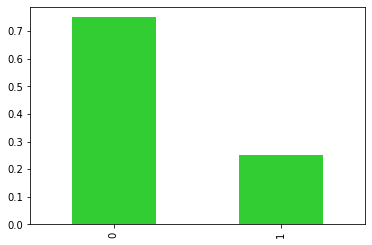

In [94]:
plt.tight_layout()
round(training.fraud_reported.value_counts(normalize=True),2).plot(kind='bar',color='limegreen')

In [95]:
from sklearn.utils import resample

In [96]:
true = training[training.fraud_reported==0]
fraud = training[training.fraud_reported==1]

In [97]:
fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(true), # match number in majority class
                          random_state=seed) # reproducible results

In [98]:
upsampled = pd.concat([true, fraud_upsampled])

In [99]:
upsampled.fraud_reported.value_counts()

1    552
0    552
Name: fraud_reported, dtype: int64

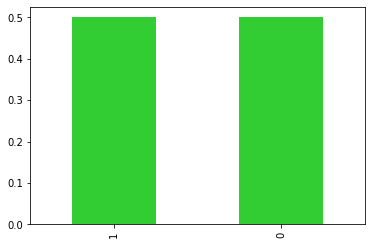

In [100]:
plt.tight_layout()
round(upsampled.fraud_reported.value_counts(normalize=True),2).plot(kind='bar',color='limegreen')

In [101]:
print(upsampled.shape)
upsampled.head()

(1104, 161)


,index,months_as_customer,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,...,in-month_4,in-month_5,in-month_6,in-month_7,in-month_8,in-month_9,in-month_10,in-month_11,in-month_12,fraud_reported
606,615,-0.193709,0.363399,-0.762369,-0.154314,-5.961156,-0.765438,-0.048347,-0.051224,-0.529484,...,0,0,0,0,0,0,0,0,0,0
99,100,0.060268,0.265123,-0.762369,0.138352,-5.961156,-0.770620,-0.946298,-0.139045,0.480538,...,0,0,0,0,0,0,1,0,0,0
49,50,0.351040,0.153487,0.384026,0.053372,0.107217,-0.364964,-0.946298,0.629762,0.317352,...,0,0,0,0,0,0,1,0,0,0
193,195,0.091908,-0.401453,-0.186891,0.219252,-5.961156,-0.702567,-0.946298,0.629762,0.234296,...,0,1,0,0,0,0,0,0,0,0
463,469,-0.515496,0.399742,0.384026,-0.076226,-5.961156,-0.825522,-0.946298,0.033411,0.480538,...,0,0,0,0,0,0,1,0,0,0


In [102]:
y_train = upsampled.fraud_reported
X_train = upsampled.drop('fraud_reported', axis=1)

In [103]:
print(X_test.shape[0]==y_test.shape[0])
print(X_train.shape[0]==y_train.shape[0])

True
True


## Initial Models

In [104]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA

# metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

In [105]:
# Logistic Regression
logreg = LogisticRegression(random_state=seed)
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_test, y_test) * 100, 2)
p_score = round(precision_score(y_test,Y_pred,average='micro')*100,2)
r_score = round(recall_score(y_test,Y_pred,average='micro')*100,2)
print(f'Score: {acc_log}, Precision: {p_score}, Recall: {r_score}')

Score: 69.64, Precision: 69.64, Recall: 69.64


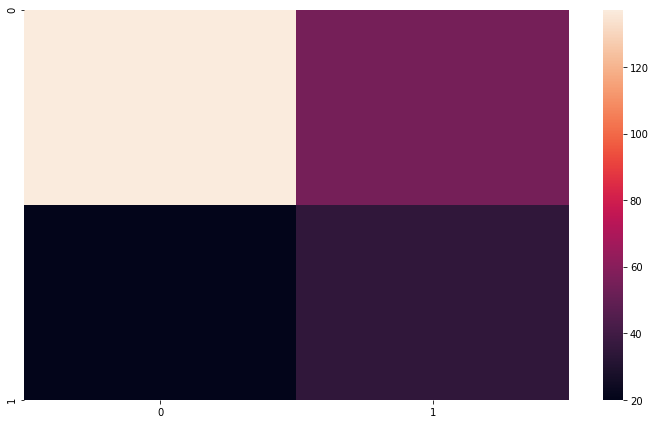

In [106]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, Y_pred))
plt.tight_layout()

In [107]:
fpr, tpr, threshold = roc_curve(y_test, Y_pred)
print(auc(fpr,tpr), threshold)

0.6749526515151516 [2 1 0]


In [108]:
# Support Vector Machine
svc = SVC(random_state=seed)
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_test, y_test) * 100, 2)
p_score = round(precision_score(y_test,Y_pred,average='micro')*100,2)
r_score = round(recall_score(y_test,Y_pred,average='micro')*100,2)
print(f'Score: {acc_svc}, Precision: {p_score}, Recall: {r_score}')

Score: 49.39, Precision: 49.39, Recall: 49.39


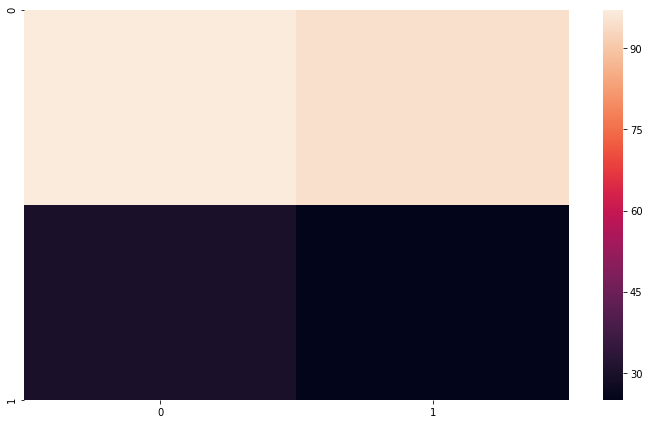

In [109]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, Y_pred))
plt.tight_layout()

In [110]:
fpr, tpr, threshold = roc_curve(y_test, Y_pred)
print(auc(fpr,tpr), threshold)

0.4798768939393939 [2 1 0]


In [111]:
# kNN

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_test, y_test) * 100, 2)
acc_knn
p_score = round(precision_score(y_test,Y_pred,average='micro')*100,2)
r_score = round(recall_score(y_test,Y_pred,average='micro')*100,2)
print(f'Score: {acc_knn}, Precision: {p_score}, Recall: {r_score}')

Score: 55.47, Precision: 55.47, Recall: 55.47


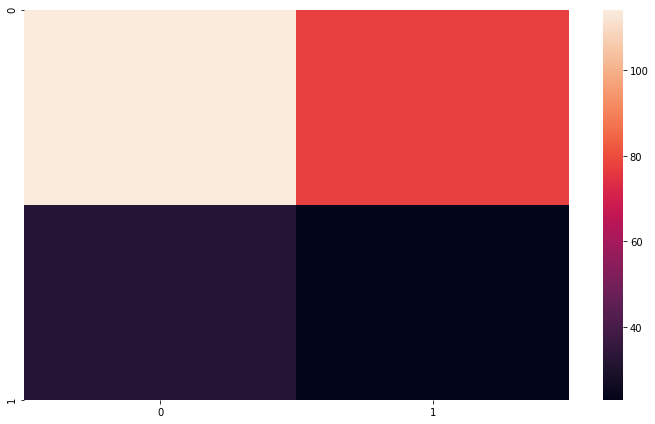

In [112]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, Y_pred))
plt.tight_layout()

In [113]:
fpr, tpr, threshold = roc_curve(y_test, Y_pred)
print(auc(fpr,tpr), threshold)

0.5059659090909091 [2 1 0]


In [114]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_test, y_test) * 100, 2)
acc_gaussian
p_score = round(precision_score(y_test,Y_pred,average='micro')*100,2)
r_score = round(recall_score(y_test,Y_pred,average='micro')*100,2)
print(f'Score: {acc_gaussian}, Precision: {p_score}, Recall: {r_score}')

Score: 61.94, Precision: 61.94, Recall: 61.94


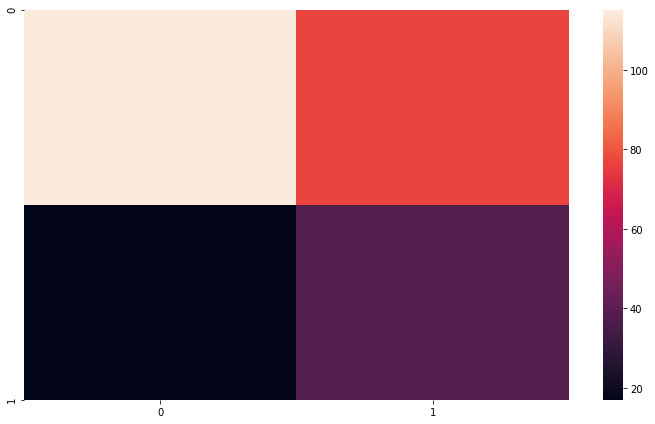

In [115]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, Y_pred))
plt.tight_layout()

In [116]:
fpr, tpr, threshold = roc_curve(y_test, Y_pred)
print(auc(fpr,tpr), threshold)

0.6449337121212121 [2 1 0]


In [117]:
# Linear SVC

linear_svc = LinearSVC(random_state=seed)
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_test, y_test) * 100, 2)
acc_linear_svc
p_score = round(precision_score(y_test,Y_pred,average='micro')*100,2)
r_score = round(recall_score(y_test,Y_pred,average='micro')*100,2)
print(f'Score: {acc_linear_svc}, Precision: {p_score}, Recall: {r_score}')

Score: 22.27, Precision: 22.27, Recall: 22.27


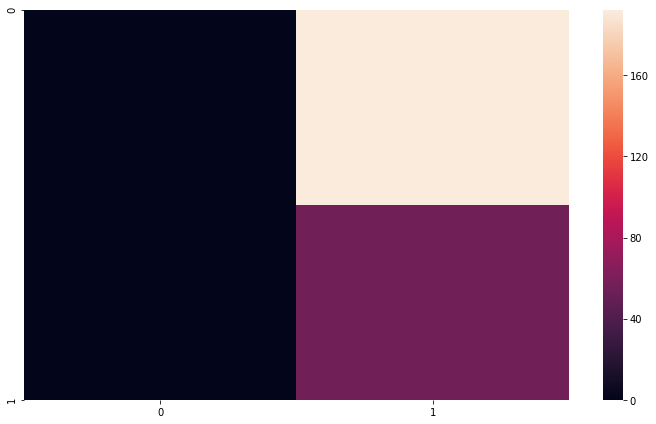

In [118]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, Y_pred))
plt.tight_layout()

In [119]:
fpr, tpr, threshold = roc_curve(y_test, Y_pred)
print(auc(fpr,tpr), threshold)

0.5 [2 1]


In [120]:
# Stochastic Gradient Descent

sgd = SGDClassifier(random_state=seed)
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_test, y_test) * 100, 2)
acc_sgd
p_score = round(precision_score(y_test,Y_pred,average='micro')*100,2)
r_score = round(recall_score(y_test,Y_pred,average='micro')*100,2)
print(f'Score: {acc_sgd}, Precision: {p_score}, Recall: {r_score}')

Score: 22.27, Precision: 22.27, Recall: 22.27


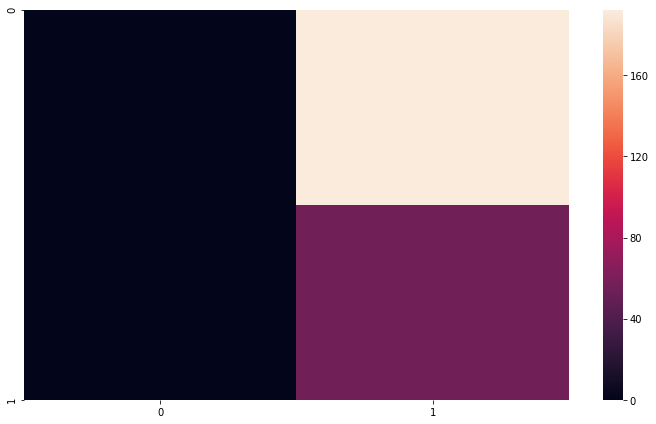

In [121]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, Y_pred))
plt.tight_layout()

In [122]:
fpr, tpr, threshold = roc_curve(y_test, Y_pred)
print(auc(fpr,tpr), threshold)

0.5 [2 1]


In [123]:
# Decision Tree

decision_tree = DecisionTreeClassifier(random_state=seed)
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_test, y_test) * 100, 2)
acc_decision_tree
p_score = round(precision_score(y_test,Y_pred,average='micro')*100,2)
r_score = round(recall_score(y_test,Y_pred,average='micro')*100,2)
print(f'Score: {acc_decision_tree}, Precision: {p_score}, Recall: {r_score}')

Score: 78.14, Precision: 78.14, Recall: 78.14


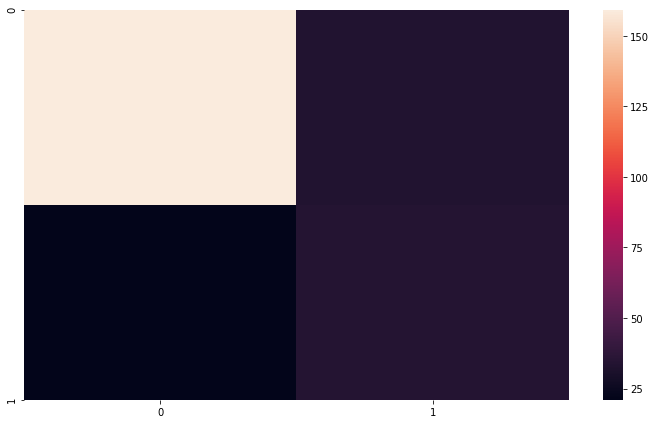

In [124]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, Y_pred))
plt.tight_layout()

In [125]:
fpr, tpr, threshold = roc_curve(y_test, Y_pred)
print(auc(fpr,tpr), threshold)

0.7231534090909091 [2 1 0]


In [126]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100,random_state=seed)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_test, y_test)
acc_random_forest = round(random_forest.score(X_test, y_test) * 100, 2)
acc_random_forest
p_score = round(precision_score(y_test,Y_pred,average='micro')*100,2)
r_score = round(recall_score(y_test,Y_pred,average='micro')*100,2)
print(f'Score: {acc_random_forest}, Precision: {p_score}, Recall: {r_score}')

Score: 78.14, Precision: 78.14, Recall: 78.14


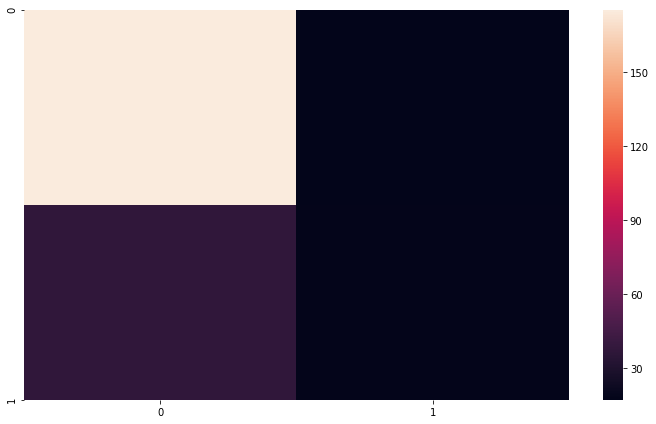

In [127]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, Y_pred))
plt.tight_layout()

In [128]:
fpr, tpr, threshold = roc_curve(y_test, Y_pred)
print(auc(fpr,tpr), threshold)

0.6193655303030303 [2 1 0]


## Initial summary

In [143]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False).T

,3,7,2,4,1,0,5,6
Model,Random Forest,Decision Tree,Logistic Regression,Naive Bayes,KNN,Support Vector Machines,Stochastic Gradient Decent,Linear SVC
Score,78.14,78.14,69.64,61.94,55.47,49.39,22.27,22.27


In [144]:
importances = decision_tree.feature_importances_
importance_df = pd.DataFrame(importances).T
importance_df.columns = X_train.columns
importance_df.T

,0
index,0.015459
months_as_customer,0.017280
policy_number,0.027610
policy_deductable,0.004348
policy_annual_premium,0.026693
...,...
in-month_8,0.000000
in-month_9,0.000000
in-month_10,0.000000
in-month_11,0.000000


In [145]:
importance_df_sorted=pd.DataFrame(importance_df.T[0].sort_values())
importance_df_sorted[::-1].head(10)

,0
chess,0.130147
Minor Damage,0.116530
Trivial Damage,0.116300
cross-fit,0.107020
Total Loss,0.100167
insured_zip,0.041785
policy_number,0.027610
policy_annual_premium,0.026693
injury_claim,0.023091
months_as_customer,0.017280


## Regularization

In [147]:
import statsmodels
from sklearn.linear_model import Ridge, Lasso, ElasticNet, ElasticNetCV

## Next steps

#### add EDA, pipeline, grid search, k-fold cross validation, XGboost, hypothesis testing